<a href="https://colab.research.google.com/github/zahrafl/data_mining/blob/main/data/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Pandas dan sklearn.datasets
import pandas as pd
from sklearn.datasets import load_iris

# Memanggil datasets iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
print("nama fitur: {}". format(iris.feature_names))
print("nama target: {}". format(iris.target_names))

nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
nama target: ['setosa' 'versicolor' 'virginica']


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model tanpa tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_no_tuning = KNeighborsClassifier(n_neighbors= 7)

# latih model pada data training
model_no_tuning.fit(X_train, y_train)

# evaluasi model pada data testing
y_pred = model_no_tuning.predict(X_test)
# model tanpa tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_no_tuning = KNeighborsClassifier(n_neighbors= 7)

# latih model pada data training
model_no_tuning.fit(X_train, y_train)

# evaluasi model pada data testing
y_pred = model_no_tuning.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi model tanpa tuning (n_neighbors = 7): {accuracy:.5f}")

Akurasi model tanpa tuning (n_neighbors = 7): 0.96667


In [ ]:
# Inisialisasi skor terbaik dan parameter terbaik
skor_terbaik = 0
parameter_terbaik = None
akurasi_list = []

In [ ]:
# Loop untuk n_neighbors dari 1 hingga 10
for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Latih model pada data training
    knn.fit(X_train, y_train)

    # Hitung akurasi model pada data test
    y_pred_tuning = knn.predict(X_test)
    akurasi_tuning = accuracy_score(y_test, y_pred_tuning)

    # Append akurasi ke list
    akurasi_list.append(akurasi_tuning)

    # Cetak hasik akurasi untuk setiap n_neighbors
    print(f"n_neighbors = {n_neighbors}, akurasi = {akurasi_tuning:.5f}")

    # Simpan model dengan skor terbaik
    if akurasi_tuning > skor_terbaik:
      skor_terbaik = akurasi_tuning
      parameter_terbaik = {'n_neighbors': n_neighbors}
      model_akhir = knn # Simpan model terbaik

n_neighbors = 1, akurasi = 1.00000
n_neighbors = 2, akurasi = 1.00000
n_neighbors = 3, akurasi = 1.00000
n_neighbors = 4, akurasi = 1.00000
n_neighbors = 5, akurasi = 1.00000
n_neighbors = 6, akurasi = 1.00000
n_neighbors = 7, akurasi = 0.96667
n_neighbors = 8, akurasi = 1.00000
n_neighbors = 9, akurasi = 1.00000
n_neighbors = 10, akurasi = 1.00000


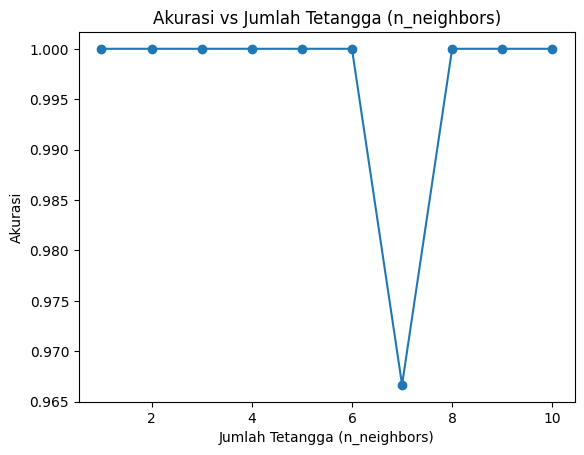

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


# Membuat plot akurasi vs jumlah tetangga
plt.plot(range(1, 11), akurasi_list, marker='o')
plt.title('Akurasi vs Jumlah Tetangga (n_neighbors)')
plt.xlabel('Jumlah Tetangga (n_neighbors)')
plt.ylabel('Akurasi')
plt.show()